In [2]:
import pandas as pd
import json
from KDEpy import FFTKDE
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt

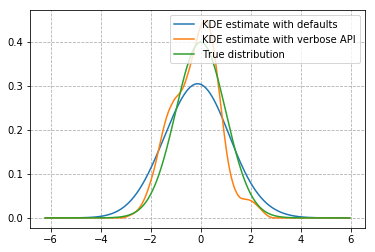

In [8]:
# Generate a distribution and draw 2**6 data points
dist = norm(loc=0, scale=1)
data = dist.rvs(2**6)

# Compute kernel density estimate on a grid using Silverman's rule for bw
x, y1 = FFTKDE().fit(data)(2**10)

# Compute a weighted estimate on the same grid, using verbose API
weights = np.arange(len(data)) + 1
estimator = FFTKDE(kernel='biweight', bw='silverman')
y2 = estimator.fit(data, weights=weights).evaluate(x)

# uncomment to see example plot
#plt.plot(x, y1, label='KDE estimate with defaults')
#plt.plot(x, y2, label='KDE estimate with verbose API')
#plt.plot(x, dist.pdf(x), label='True distribution')
#plt.grid(True, ls='--', zorder=-15); plt.legend()

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

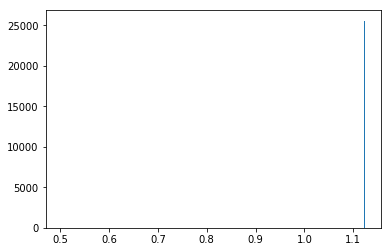

In [20]:
# load data frame from csv
df = pd.read_csv("/abcdqc_data/batchserver/output/df.csv")

# colums of interest:
# 'bids_meta.Manufacturer', 'bids_meta.ManufacturersModelName'
# 'efc'

#print(min(df['efc']), ', ', max(df['efc']))

plt.hist(df['cjv'], bins=300)
#plt.xlim(0.515, 0.521)

In [9]:
x

array([-6.21792226, -6.20602167, -6.19412108, ...,  5.93257508,
        5.94447567,  5.95637625])

In [10]:
y1

array([1.15793585e-06, 1.63392893e-06, 1.71471474e-06, ...,
       1.71471474e-06, 1.63392893e-06, 1.15793585e-06])

In [11]:
len(x)

1024

In [12]:
len(y1)

1024

In [13]:
y2

array([2.45729363e-16, 2.81256500e-16, 2.33886984e-16, ...,
       2.59792188e-16, 2.25745348e-16, 2.33886984e-16])

In [28]:
test_df = pd.DataFrame()
test_df['xvar'] = x
test_df['yvar'] = y1

In [34]:
test_df.to_json('test.json', orient = 'table', index = False)